## Project - Recommendation system ( Due: 9-Feb-2020) 

### Problem Statement
* Build your **own recommendation system** for products on an e-commerce website like Amazon.com.
* **Dataset Link** - https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing
* **Dataset columns** - first three columns are **userId, productId, and ratings** and the fourth column is **timestamp**. You can discard the timestamp column as in this case you may not need to use it.
* **Source** - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has several datasets. For this case study, we are using the Electronics dataset.

### 1. Read and explore the given dataset. 
(Rename column/add headers, plot histograms, find data characteristics)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Ensure that we do not lose the first row, hence make header none
ratings_elec = pd.read_csv('ratings_Electronics.csv', header=None)

In [3]:
ratings_elec.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
# Rename the columns based on the project document
ratings_elec.rename(columns={0: "userID", 1: "itemID", 2: "elecRating", 3:"timestamp"}, inplace=True)

In [5]:
ratings_elec.head()

,userID,itemID,elecRating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
ratings_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userID        object
itemID        object
elecRating    float64
timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


> * Rating the only categorical column. User id and Item ID are identifiers
> * Drop the timestamp column as it is not useful for the recommendation

In [7]:
ratings_elec.drop(['timestamp'], axis=1, inplace=True)

In [8]:
ratings_elec.head()

,userID,itemID,elecRating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [9]:
ratings_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userID        object
itemID        object
elecRating    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [10]:
ratings_elec.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
elecRating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


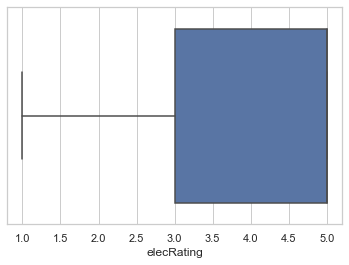

In [11]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=ratings_elec['elecRating'])

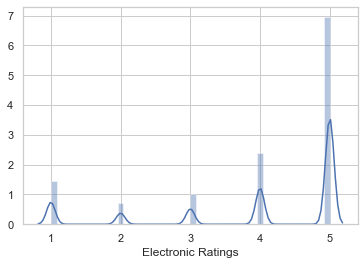

In [12]:
# Histogram of ratings...
# sns.pairplot(ratings_elec, diag_kind='hist')
import pandas as pd
x = pd.Series(ratings_elec['elecRating'], name="Electronic Ratings")
sns.distplot(x)

> * Maximum number of customers have rated 5 followed by 4 for the electronic items they have recieved.
> * Very less people have rated in the range of 1-3

In [13]:
#Find the total number of unique users, items ids and the ratings...
ratings_elec.nunique()

userID        4201696
itemID         476002
elecRating          5
dtype: int64

> * There are more users than the number of items
> * Rating is in the scale of 1-5

In [14]:
ratings_elec.isnull().sum()

userID        0
itemID        0
elecRating    0
dtype: int64

> * There are no null items in the dataframe

### Users who have provided maximum number of ratings for the items purchased - Report Top 10 users

In [15]:
# Users with max no of electronic items purchased
# Top 10 users..
ratings_elec["userID"].value_counts().head(10)

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
Name: userID, dtype: int64

### 2. Take a subset of the dataset to make it less sparse/ denser. 
(For example, keep the users only who has given 50 or more number of ratings )

In [16]:
rating_count = ratings_elec.groupby('userID')['elecRating'].count()
rating_count_df = pd.DataFrame(rating_count)
rating_count_df.reset_index(inplace=True)
rating_count_df.columns = ['userID', 'ratingCount']
rating_count_df = rating_count_df.sort_values(by='ratingCount', ascending=False)

In [17]:
rating_count_df.head()

,userID,ratingCount
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406


#### Select users who have provided 50 or more ratings

In [18]:
freq_ratedusers_df = rating_count_df[rating_count_df['ratingCount'] > 50]
freq_ratedusers_df['userID'].shape

(1466,)

#### Observations
> * There are 1466 users who have provided 50 or more ratings

In [19]:
ratings_elec.shape

(7824482, 3)

#### Get the final filtered dataframe to select only those users who have provided 50 or more ratings

In [20]:
# Use inner join of the unique users who have provided 50 or more ratings with the original dataframe...
filter_popular_users_df = pd.merge(ratings_elec, freq_ratedusers_df['userID'], on='userID', how='inner')
filter_popular_users_df.shape

(122171, 3)

### 3. Build Popularity Recommender model.

#### Which items are bought the most by the users ?

In [21]:
item_count = ratings_elec.groupby('itemID')['userID'].count()
item_count_df = pd.DataFrame(item_count)
item_count_df.reset_index(inplace=True)
item_count_df.columns = ['itemID', 'Users_who_bought_this_item']
item_count_df = item_count_df.sort_values(by='Users_who_bought_this_item', ascending=False)
item_count_df

,itemID,Users_who_bought_this_item
308398,B0074BW614,18244
429572,B00DR0PDNE,16454
327308,B007WTAJTO,14172
102804,B0019EHU8G,12285
296625,B006GWO5WK,12226
...,...,...
248010,B004WL91KI,1
248011,B004WL9FK4,1
248015,B004WL9Q2Q,1
248016,B004WL9R8O,1


#### Top ten items which are most popular among users...

In [22]:
item_count_df['Rank'] = item_count_df['Users_who_bought_this_item'].rank(method='dense', ascending=False)
item_count_df.head(10)

,itemID,Users_who_bought_this_item,Rank
308398,B0074BW614,18244,1.0
429572,B00DR0PDNE,16454,2.0
327308,B007WTAJTO,14172,3.0
102804,B0019EHU8G,12285,4.0
296625,B006GWO5WK,12226,5.0
178601,B003ELYQGG,11617,6.0
178813,B003ES5ZUU,10276,7.0
323013,B007R5YDYA,9907,8.0
289775,B00622AG6S,9823,9.0
30276,B0002L5R78,9487,10.0


### 4. Split the data randomly into train and test dataset. 
(For example, split it in 70/30 ratio) 

In [23]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

#### Set the rating scale from 1 to 5
reader = Reader(rating_scale=(1, 5))

In [24]:
data = Dataset.load_from_df(filter_popular_users_df[['userID', 'itemID', 'elecRating']], reader)

In [25]:
filter_popular_users_df.shape

(122171, 3)

In [26]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.3,random_state=123)

In [27]:
trainset.n_ratings

85519

### Try 2 different ways in Collaborative filtering 
> * **A.** Item based Collaborative filtering Model
> * **B.** Model based - Using SVD

### 5-A. Build Collaborative Filtering model.

####  Option-1 : Build Collaborative Filtering model using Item Based Collaborative filtering

In [28]:
filter_popular_users_df.shape

(122171, 3)

In [29]:
len(testset)

36652

In [30]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [31]:
algo = KNNWithMeans(k=51, sim_options={'name': 'pearson', 'user_based': False})
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [32]:
#neighbours = algo.get_neighbors(trainset.to_inner_iid('Finding Nemo (2003)'), 3)
#for j in neighbours:
#    print(trainset.to_raw_iid(j))

In [33]:
# Evalute on test set
test_pred = algo.test(testset)

In [34]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])
test_pred_df.head()

,0,1,2
0,A4UGMKUSX9XHI,B004TIIBMS,5.000000
1,A2X06FP2PQ6EK0,B0007R4LI8,4.166667
2,A2HMF8ZR67BNZS,B0012DAD2E,4.265567
3,A3HR0ZZOFKQ97N,B00GLXAAOQ,5.000000
4,A3SMD3T0QTN109,B001UI2FPE,4.789474


In [35]:
test_pred_df.columns = ["userID","itemID","pred_elecRating"]
test_pred_df.sort_values(by = ["userID", "pred_elecRating"],ascending=False,inplace=True)

In [36]:
test_pred_df.head()

,userID,itemID,pred_elecRating
2212,AZOK5STV85FBJ,B005003WAA,5.000000
4218,AZOK5STV85FBJ,B0002BA570,5.000000
26820,AZOK5STV85FBJ,B00BF6HVG4,5.000000
4864,AZOK5STV85FBJ,B00104XCVO,4.888889
26567,AZOK5STV85FBJ,B000O5N5AI,4.750000


### 6-A. Evaluate the above model. You can also use a different method to evaluate the models....
(Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) 

In [37]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.1299


1.129935955448787

### 7-A. Get top - K ( K = 5) recommendations. 
(Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.)

In [38]:
top_5_recos = test_pred_df.groupby("userID").head(5).reset_index(drop=True)

In [39]:
top_5_recos.head(30)

,userID,itemID,pred_elecRating
0,AZOK5STV85FBJ,B005003WAA,5.000000
1,AZOK5STV85FBJ,B0002BA570,5.000000
2,AZOK5STV85FBJ,B00BF6HVG4,5.000000
3,AZOK5STV85FBJ,B00104XCVO,4.888889
4,AZOK5STV85FBJ,B000O5N5AI,4.750000
5,AZNUHQSHZHSUE,B002LARYGA,5.000000
6,AZNUHQSHZHSUE,B005BCAKO8,4.666667
7,AZNUHQSHZHSUE,B000W5RBQE,4.600000
8,AZNUHQSHZHSUE,B003XE3X8Q,4.409091
9,AZNUHQSHZHSUE,B0016J5TGY,4.265567


### 8-A. Summarise your insights.

> * Item based Collaborative filtering we are able to suggest new products to each user
> * In this case, Item based Collaborative filtering results are much more accurate than SVD model results since the RMSE is much lower for Item based Collab filtering..
> * In this case we have suggested only 5 products. By tweaking the **head(5) to a bigger number** we can get much more item recommendations to the user.
> * The only drawback of Item based collab filtering is that it takes more time to compute. More the neighbours value(K) in **KnnWithMeans** more is the compute time. Ideal to run on server with more compute resources.

### 5-B. Build Collaborative Filtering model.

#### Option-2 : Use Collaborative Filtering model based - SVD method..

In [40]:
from surprise import SVD
from surprise import accuracy

In [41]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [42]:
test_pred = svd_model.test(testset)

In [43]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])
test_pred_df.head()

,0,1,2
0,A4UGMKUSX9XHI,B004TIIBMS,1.685269
1,A2X06FP2PQ6EK0,B0007R4LI8,1.482543
2,A2HMF8ZR67BNZS,B0012DAD2E,4.265567
3,A3HR0ZZOFKQ97N,B00GLXAAOQ,3.032695
4,A3SMD3T0QTN109,B001UI2FPE,4.263925


In [44]:
test_pred_df.columns = ["userID","itemID","pred_elecRating"]
test_pred_df.sort_values(by = ["userID", "pred_elecRating"],ascending=False,inplace=True)

In [45]:
test_pred_df.head()

,userID,itemID,pred_elecRating
16986,AZOK5STV85FBJ,B000CMGJ0G,4.265567
18809,AZOK5STV85FBJ,B000UGT5GO,4.265567
20505,AZOK5STV85FBJ,B000X39TKG,4.265567
24087,AZOK5STV85FBJ,B000VS7XY2,4.265567
26184,AZOK5STV85FBJ,B003AXAAWW,4.265567


### 6-B. Evaluate the above model. You can also use a different method to evaluate the models....
(Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) 

In [46]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.9982


1.9982039893890176

### 7-B. Get top - K ( K = 5) recommendations. 
(Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.)

In [47]:
top_5_recos = test_pred_df.groupby("userID").head(5).reset_index(drop=True)

In [48]:
top_5_recos.head(30)

,userID,itemID,pred_elecRating
0,AZOK5STV85FBJ,B000CMGJ0G,4.265567
1,AZOK5STV85FBJ,B000UGT5GO,4.265567
2,AZOK5STV85FBJ,B000X39TKG,4.265567
3,AZOK5STV85FBJ,B000VS7XY2,4.265567
4,AZOK5STV85FBJ,B003AXAAWW,4.265567
5,AZNUHQSHZHSUE,B0016J5TGY,4.265567
6,AZNUHQSHZHSUE,B000A6AXHE,4.265567
7,AZNUHQSHZHSUE,B000X27U44,4.265567
8,AZNUHQSHZHSUE,B001DFZ5J2,4.265567
9,AZNUHQSHZHSUE,B0043IA6J0,4.265567


### 8-B. Summarise your insights.

> * SVD based Collaborative filtering we are able to suggest new products to each user
> * SVD is faster compared to Item based Collab Filtering. However the accuracy is comparitively lesser as compared to Item based Collab filtering as the RMSE is relatively greater in this case.
> * In this case we have suggested only 5 products. By tweaking the **head(5) to a bigger number** we can get much more item recommendations to the user.